In [1]:
#cd /mnt/c/Users/chari/Documents/Logistics/openrouteservice/
#docker compose up -d

In [2]:
import requests

# Replace with your OpenRouteService URL and API Key if required
BASE_URL = "http://localhost:8080/ors"
API_KEY = ""  # Optional if your setup requires an API key


The `check_health` function verifies whether the OpenRouteService (ORS) instance is running and accessible. It sends a GET request to the ORS health check endpoint (`/v2/health`). If the service is operational, it prints the health status in JSON format. In case of an error, such as connection issues or server unavailability, it catches the exception and prints a failure message.

In [3]:
def check_health():
    """Check if the OpenRouteService instance is running."""
    health_url = f"{BASE_URL}/v2/health"
    try:
        response = requests.get(health_url)
        print("Health Check:", response.json())
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print("Health check failed:", e)

The test_routing function sends a routing request to the OpenRouteService (ORS) API to calculate directions for a specified set of coordinates using the "driving-car" profile. It includes optional headers, such as an API key for authentication, and requests additional route instructions. The function processes the response, printing the results or raising an exception if the request fails.

In [4]:
def test_routing():
    """Send a routing request to OpenRouteService."""
    route_url = f"{BASE_URL}/v2/directions/driving-car"
    headers = {
        "Content-Type": "application/json",
        "Authorization": API_KEY  # Add if required
    }
    data = {
        "coordinates": [[8.681495, 49.41461], [8.687872, 49.420318]],
        "instructions": True
    }
    
    try:
        response = requests.post(route_url, json=data, headers=headers)
        print("Routing Response:", response.json())
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print("Routing request failed:", e)

In [5]:
print("Checking Health of OpenRouteService...")
check_health()

print("\nTesting Routing...")
test_routing()


Checking Health of OpenRouteService...
Health Check: {'status': 'ready'}

Testing Routing...
Routing Response: {'error': {'code': 2010, 'message': 'Could not find routable point within a radius of 400.0 meters of specified coordinate 0: 8.6814950 49.4146100.'}, 'info': {'engine': {'build_date': '2024-03-21T13:55:54Z', 'version': '8.0.0'}, 'timestamp': 1735183803711}}
Routing request failed: 404 Client Error:  for url: http://localhost:8080/ors/v2/directions/driving-car


The `test_morocco_routing` function sends a routing request to the OpenRouteService API to calculate a driving route between two coordinates in Morocco. It constructs a request payload with the specified start and end coordinates, includes optional headers for authorization if required, and sends the request to the `/v2/directions/driving-car` endpoint. The function then prints the API's JSON response and raises an exception if the request fails, providing a straightforward mechanism to test routing functionality for a specific use case.

In [6]:
def test_morocco_routing():
    """Send a routing request to OpenRouteService."""
    route_url = f"{BASE_URL}/v2/directions/driving-car"
    headers = {
        "Content-Type": "application/json",
        "Authorization": API_KEY  # Add if required
    }
    data = {
        "coordinates": [[-7.589843, 33.57311], [-6.849813, 34.020882]],
        "instructions": True
    }
    
    try:
        response = requests.post(route_url, json=data, headers=headers)
        
        print("Routing Response:", response.json())
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print("Routing request failed:", e)


In [7]:
print("\nTesting from casa to rabat Routing...")
test_morocco_routing()


Testing from casa to rabat Routing...
Routing Response: {'routes': [{'summary': {'distance': 89480.1, 'duration': 3603.3}, 'segments': [{'distance': 89480.1, 'duration': 3603.3, 'steps': [{'distance': 41.3, 'duration': 9.9, 'type': 11, 'instruction': 'Head northeast on Rue 75', 'name': 'Rue 75', 'way_points': [0, 2]}, {'distance': 107.2, 'duration': 25.7, 'type': 0, 'instruction': 'Turn left onto Rue 77', 'name': 'Rue 77', 'way_points': [2, 7]}, {'distance': 40.5, 'duration': 9.7, 'type': 1, 'instruction': 'Turn right onto Rue 3', 'name': 'Rue 3', 'way_points': [7, 8]}, {'distance': 117.2, 'duration': 28.1, 'type': 0, 'instruction': 'Turn left onto Rue 7', 'name': 'Rue 7', 'way_points': [8, 12]}, {'distance': 352.9, 'duration': 34.8, 'type': 1, 'instruction': 'Turn right onto Boulevard de la Croix', 'name': 'Boulevard de la Croix', 'way_points': [12, 19]}, {'distance': 458.5, 'duration': 38.3, 'type': 3, 'instruction': 'Turn sharp right onto Avenue Abdelkrim Al-Khatib', 'name': 'Avenu

## test morroco 

This defines a set of coordinates for major cities in Morocco and approximate thresholds for distances (in kilometers) and durations (in hours) between specific city pairs. The CITIES dictionary stores the longitude and latitude of each city, while the THRESHOLDS dictionary specifies acceptable minimum and maximum distances and travel times between pairs of cities, providing a framework for validating or benchmarking routing calculations in logistical or travel applications.

In [8]:
# Coordinates of major cities in Morocco
CITIES = {
    "Casablanca": [-7.589843, 33.57311],
    "Rabat": [-6.849813, 34.020882],
    "Marrakech": [-8.008889, 31.634161],
    "Fes": [-4.999804, 34.033126]
}

# Approximate thresholds (distance in km, duration in hours)
THRESHOLDS = {
    ("Casablanca", "Rabat"): {"min_distance": 80, "max_distance": 100, "min_duration": 1, "max_duration": 1.5},
    ("Casablanca", "Marrakech"): {"min_distance": 220, "max_distance": 250, "min_duration": 2.5, "max_duration": 3.5},
    ("Casablanca", "Fes"): {"min_distance": 280, "max_distance": 320, "min_duration": 3.5, "max_duration": 4.5},
    ("Rabat", "Fes"): {"min_distance": 190, "max_distance": 230, "min_duration": 2.5, "max_duration": 3.5},
    ("Rabat", "Marrakech"): {"min_distance": 270, "max_distance": 310, "min_duration": 3.5, "max_duration": 4.5},
    ("Marrakech", "Fes"): {"min_distance": 470, "max_distance": 510, "min_duration": 6, "max_duration": 7}
}

The test_routing_between_cities function systematically tests route calculations between pairs of Moroccan cities using the OpenRouteService API. For each pair of cities, it sends a routing request with their coordinates, retrieves the route data (distance and duration), and validates it against predefined thresholds for expected distances and durations. If a route falls outside the expected range, it issues a warning; otherwise, it confirms the route's validity. The function also handles errors gracefully, providing feedback when requests fail or no routes are found. This ensures the robustness of the routing service for realistic scenarios.

In [9]:
def test_routing_between_cities():
    """Test routing between Moroccan cities with realistic thresholds."""
    route_url = f"{BASE_URL}/v2/directions/driving-car"
    headers = {
        "Content-Type": "application/json",
        "Authorization": API_KEY  # Add if required
    }

    for city1, coords1 in CITIES.items():
        for city2, coords2 in CITIES.items():
            if city1 == city2:
                continue  # Skip routing to the same city

            print(f"Testing route from {city1} to {city2}...")
            data = {
                "coordinates": [coords1, coords2],
                "instructions": True
            }
            print(f"Testing coordinates from {[coords1, coords2]}...")
            
            try:
                response = requests.post(route_url, json=data, headers=headers)
                
                route_data = response.json()
                print(f"The respose is : {route_data}")
                
                response.raise_for_status()

                # Validate response structure
                if "routes" not in route_data or len(route_data["routes"]) == 0:
                    print(f"Error: No route found from {city1} to {city2}")
                    continue

                # Extract route details
                route = route_data["routes"][0]
                distance = route.get("summary", {}).get("distance", 0) / 1000  # Convert to km
                duration = route.get("summary", {}).get("duration", 0) / 3600  # Convert to hours

                # Get thresholds
                key = (city1, city2) if (city1, city2) in THRESHOLDS else (city2, city1)
                thresholds = THRESHOLDS.get(key, {"min_distance": 0, "max_distance": float("inf"),
                                                  "min_duration": 0, "max_duration": float("inf")})

                if thresholds["min_distance"] <= distance <= thresholds["max_distance"] and \
                   thresholds["min_duration"] <= duration <= thresholds["max_duration"]:
                    print(f"Route from {city1} to {city2} is sound. Distance: {distance:.2f} km, Duration: {duration:.2f} hours")
                else:
                    print(f"Warning: Route from {city1} to {city2} has unexpected values. "
                          f"Distance: {distance:.2f} km (expected {thresholds['min_distance']}-{thresholds['max_distance']} km), "
                          f"Duration: {duration:.2f} hours (expected {thresholds['min_duration']}-{thresholds['max_duration']} hours)")

            except requests.exceptions.RequestException as e:
                print(f"Routing request failed for {city1} to {city2}: {e}")

In [10]:
print("Testing routing between Moroccan cities with realistic thresholds...")
test_routing_between_cities()

Testing routing between Moroccan cities with realistic thresholds...
Testing route from Casablanca to Rabat...
Testing coordinates from [[-7.589843, 33.57311], [-6.849813, 34.020882]]...
The respose is : {'routes': [{'summary': {'distance': 89480.1, 'duration': 3603.3}, 'segments': [{'distance': 89480.1, 'duration': 3603.3, 'steps': [{'distance': 41.3, 'duration': 9.9, 'type': 11, 'instruction': 'Head northeast on Rue 75', 'name': 'Rue 75', 'way_points': [0, 2]}, {'distance': 107.2, 'duration': 25.7, 'type': 0, 'instruction': 'Turn left onto Rue 77', 'name': 'Rue 77', 'way_points': [2, 7]}, {'distance': 40.5, 'duration': 9.7, 'type': 1, 'instruction': 'Turn right onto Rue 3', 'name': 'Rue 3', 'way_points': [7, 8]}, {'distance': 117.2, 'duration': 28.1, 'type': 0, 'instruction': 'Turn left onto Rue 7', 'name': 'Rue 7', 'way_points': [8, 12]}, {'distance': 352.9, 'duration': 34.8, 'type': 1, 'instruction': 'Turn right onto Boulevard de la Croix', 'name': 'Boulevard de la Croix', 'way_poi

## VROOM

In [11]:

import json

VROOM_URL = "http://localhost:3000"  # Adjust if your VROOM instance runs elsewhere

The test_optimization_static function demonstrates a static test for route optimization using the VROOM API. It defines a payload with two vehicles and several jobs, each with unique constraints such as skills, time windows, delivery capacities, and service durations. The payload also includes a shipment with a pickup and delivery task. The function sends this data to the VROOM API via a POST request, logs the raw response, and formats the result for inspection. This setup simulates a realistic multi-vehicle routing scenario, making it ideal for validating optimization configurations and debugging API interactions.

In [12]:
def test_optimization_static():
    """Test route optimization using the specified format."""
    payload = {
        "vehicles": [
            {
                "id": 1,
                "profile":  "driving-car",
                "start": [-7.589843, 33.57311],  # Casablanca
                "end": [-7.589843, 33.57311],    # Return to Casablanca
                "capacity": [4],
                "skills": [1, 14], 
                "time_window": [1600416000, 1600430400]
            },
            {
                "id": 2,
                "profile":  "driving-car",
                "start": [-7.589843, 33.57311],  # Casablanca
                "end": [-7.589843, 33.57311],    # Return to Casablanca
                "capacity": [4],
                "skills": [2, 14],
                "time_window": [1600416000, 1600430400],
                "breaks": [
                    {
                        "id": 2,
                        "service": 300,
                        "time_windows": [
                            [1600423200, 1600425000]
                        ]
                    }
                ]
            }
        ],
        "jobs": [
            {
                "id": 1,
                "service": 300,
                "delivery": [1],
                "location": [-6.849813, 34.020882],  # Rabat
                "skills": [1],
                "time_windows": [
                    [1600419600, 1600423200]
                ]
            },
            {
                "id": 2,
                "service": 300,
                "pickup": [1],
                "location": [-8.008889, 31.634161],  # Marrakech
                "skills": [1]
            },
            {
                "id": 5,
                "service": 300,
                "delivery": [1],
                "location": [-4.999804, 34.033126],  # Fes
                "skills": [14]
            },
            {
                "id": 6,
                "service": 300,
                "delivery": [1],
                "location": [-7.589843, 33.57311],  # Casablanca
                "skills": [14]
            }
        ],
        "shipments": [
            {
                "amount": [1],
                "skills": [2],
                "pickup": {
                    "id": 4,
                    "service": 300,
                    "location": [-6.763812, 34.034334]  # Example pickup location
                },
                "delivery": {
                    "id": 3,
                    "service": 300,
                    "location": [-5.833954, 35.759465]  # Example delivery location
                }
            }
        ]
    }

    try:
        # Print the request for debugging
        print("Sending Request to VROOM:")
        #print(json.dumps(payload, indent=4))

        # Send the optimization request
        response = requests.post(f"{VROOM_URL}/", json=payload)
        print("\nRaw Response Content:")
        print(response.text)  # Print the raw response content

        response.raise_for_status()
        print("\nReceived Response from VROOM:")
        print(json.dumps(response.json(), indent=4))
    except requests.exceptions.RequestException as e:
        print(f"Error occurred during optimization request: {e}")
    except Exception as e:
        print(f"Unexpected error: {e}")


In [13]:
print("Testing VROOM optimization between Moroccan cities...")
test_optimization_static()

Testing VROOM optimization between Moroccan cities...
Sending Request to VROOM:

Raw Response Content:
{"code":0,"summary":{"cost":7357,"routes":1,"unassigned":4,"delivery":[2],"amount":[2],"pickup":[0],"setup":0,"service":600,"duration":7357,"waiting_time":0,"priority":0,"violations":[],"computing_times":{"loading":251,"solving":8,"routing":0}},"unassigned":[{"id":3,"location":[-5.833954,35.759465],"type":"delivery"},{"id":4,"location":[-6.763812,34.034334],"type":"pickup"},{"id":5,"location":[-4.999804,34.033126],"type":"job"},{"id":2,"location":[-8.008889,31.634161],"type":"job"}],"routes":[{"vehicle":1,"cost":7357,"delivery":[2],"amount":[2],"pickup":[0],"setup":0,"service":600,"duration":7357,"waiting_time":0,"priority":0,"steps":[{"type":"start","location":[-7.589843,33.57311],"setup":0,"service":0,"waiting_time":0,"load":[2],"arrival":1600416000,"duration":0,"violations":[]},{"type":"job","location":[-7.589843,33.57311],"id":6,"setup":0,"service":300,"waiting_time":0,"job":6,"lo

## nextplot
https://github.com/nextmv-io/nextplot

In [20]:
#!pip install argcomplete
#!pip install nextplot
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 8.0/8.0 MB 50.2 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 36.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 43.9 MB/s eta 0:00:00
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


The `plot_routes` function visualizes vehicle routes and job locations on a 2D map-like plot using Matplotlib. It takes `routes` (optimized paths from a VROOM response) and `jobs` (locations of tasks) as inputs. The function plots each route as lines connecting waypoints, labeled by vehicle ID, and marks job locations with red dots, annotated with job IDs. The plot is enhanced with grid lines, axis labels, and a legend for clarity. This visual representation provides an intuitive way to assess optimized routes and task distribution geographically.

Sending Request to VROOM...
Optimization Result:
{
    "code": 0,
    "summary": {
        "cost": 39750,
        "routes": 1,
        "unassigned": 0,
        "setup": 0,
        "service": 0,
        "duration": 39750,
        "waiting_time": 0,
        "priority": 0,
        "violations": [],
        "computing_times": {
            "loading": 52,
            "solving": 2,
            "routing": 0
        }
    },
    "unassigned": [],
    "routes": [
        {
            "vehicle": 1,
            "cost": 39750,
            "setup": 0,
            "service": 0,
            "duration": 39750,
            "waiting_time": 0,
            "priority": 0,
            "steps": [
                {
                    "type": "start",
                    "location": [
                        -7.589843,
                        33.57311
                    ],
                    "setup": 0,
                    "service": 0,
                    "waiting_time": 0,
                    "arrival": 

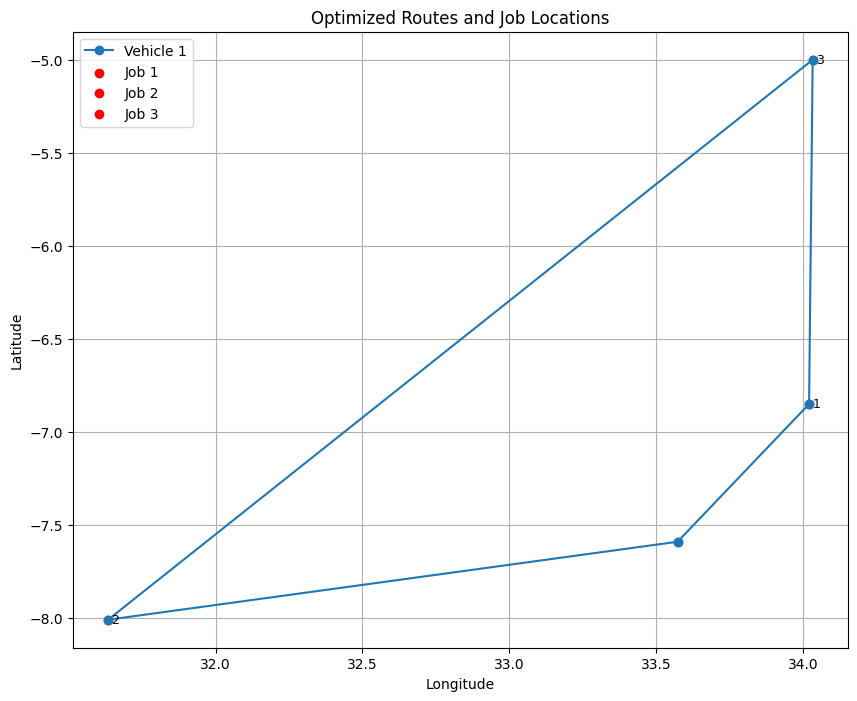

In [21]:
import requests
import json
import matplotlib.pyplot as plt

# Replace this with your VROOM server URL
VROOM_URL = "http://localhost:3000"

# Function to plot routes
def plot_routes(routes, jobs):
    """Visualize the routes on a map-like plot."""
    plt.figure(figsize=(10, 8))
    
    # Plot each route
    for route in routes:
        steps = route['steps']
        coordinates = [step['location'] for step in steps if 'location' in step]
        lats, lons = zip(*coordinates)
        plt.plot(lons, lats, marker='o', label=f"Vehicle {route['vehicle']}")

    # Plot job locations
    for job in jobs:
        lat, lon = job['location']
        plt.scatter(lon, lat, color='red', label=f"Job {job['id']}")
        plt.text(lon, lat, f" {job['id']}", fontsize=9, ha='left', va='center')

    # Configure the plot
    plt.title("Optimized Routes and Job Locations")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to test optimization and plot results
def test_and_plot():
    """Test VROOM optimization and plot the results."""
    payload = {
        "vehicles": [
            {
                "id": 1,
                "profile": "driving-car",
                "start": [-7.589843, 33.57311],  # Casablanca
                "end": [-7.589843, 33.57311],    # Return to Casablanca
            }
        ],
        "jobs": [
            {"id": 1, "location": [-6.849813, 34.020882]},  # Rabat
            {"id": 2, "location": [-8.008889, 31.634161]},  # Marrakech
            {"id": 3, "location": [-4.999804, 34.033126]},  # Fes
        ]
    }

    try:
        print("Sending Request to VROOM...")
        response = requests.post(f"{VROOM_URL}/", json=payload)

        # Check for HTTP errors
        response.raise_for_status()

        # Parse the response
        result = response.json()
        print("Optimization Result:")
        print(json.dumps(result, indent=4))

        # Extract routes and jobs for plotting
        routes = result.get("routes", [])
        jobs = payload.get("jobs", [])

        # Plot the results
        plot_routes(routes, jobs)

    except requests.exceptions.RequestException as e:
        print(f"Error occurred during optimization request: {e}")
    except json.JSONDecodeError:
        print("Error: Received an invalid JSON response.")
    except Exception as e:
        print(f"Unexpected error: {e}")

if __name__ == "__main__":
    test_and_plot()


The `plot_vroom_results_on_map` function visualizes routes and job locations from a VROOM API response on an interactive map using Folium. It centers the map on the first job's location and plots routes as blue polylines, reversing coordinates to match Folium's (latitude, longitude) format. Jobs are marked with red icons, displaying their IDs in popups. The map is saved as an HTML file (`vroom_routes_map.html`) for viewing, providing a clear and interactive representation of the optimized routes and job distribution. The accompanying `test_vroom_and_plot` function demonstrates its usage by sending a test request to a local VROOM server and plotting the results.

In [28]:
import requests
import folium
import json

# Replace this with your VROOM server URL
VROOM_URL = "http://localhost:3000"

def plot_vroom_results_on_map(routes, jobs):
    """Plot routes and jobs on an interactive folium map."""
    # Create a map centered around the first job location
    first_job = jobs[0]["location"]
    map_center = [first_job[1], first_job[0]]  # Latitude, Longitude
    map_obj = folium.Map(location=map_center, zoom_start=8)

    # Plot routes
    for route in routes:
        steps = route["steps"]
        coordinates = [step["location"][::-1] for step in steps if "location" in step]  # Reverse to (lat, lon)
        folium.PolyLine(coordinates, color="blue", weight=3, opacity=0.8).add_to(map_obj)

    # Plot jobs
    for job in jobs:
        lat, lon = job["location"][1], job["location"][0]  # Latitude, Longitude
        folium.Marker(
            location=[lat, lon],
            popup=f"Job ID: {job['id']}",
            icon=folium.Icon(color="red", icon="info-sign"),
        ).add_to(map_obj)

    # Save and display the map
    map_obj.save("vroom_routes_map.html")
    print("Map saved as 'vroom_routes_map.html'")

def test_vroom_and_plot():
    """Send a test request to VROOM and plot the results on a map."""
    payload = {
        "vehicles": [
            {
                "id": 1,
                "profile": "driving-car",
                "start": [-7.589843, 33.57311],  # Casablanca
                "end": [-7.589843, 33.57311],    # Return to Casablanca
            }
        ],
        "jobs": [
            {"id": 1, "location": [-6.849813, 34.020882]},  # Rabat
            {"id": 2, "location": [-8.008889, 31.634161]},  # Marrakech
            {"id": 3, "location": [-4.999804, 34.033126]},  # Fes
        ]
    }

    try:
        print("Sending request to VROOM...")
        response = requests.post(f"{VROOM_URL}/", json=payload)
        response.raise_for_status()

        # Parse response
        result = response.json()
        print("Optimization Result:")
        print(json.dumps(result, indent=4))

        # Extract routes and jobs
        routes = result.get("routes", [])
        jobs = payload["jobs"]

        # Plot results on a map
        plot_vroom_results_on_map(routes, jobs)

    except requests.exceptions.RequestException as e:
        print(f"HTTP Request Error: {e}")
    except Exception as e:
        print(f"Unexpected Error: {e}")

if __name__ == "__main__":
    test_vroom_and_plot()


Sending request to VROOM...
Optimization Result:
{
    "code": 0,
    "summary": {
        "cost": 39750,
        "routes": 1,
        "unassigned": 0,
        "setup": 0,
        "service": 0,
        "duration": 39750,
        "waiting_time": 0,
        "priority": 0,
        "violations": [],
        "computing_times": {
            "loading": 40,
            "solving": 6,
            "routing": 0
        }
    },
    "unassigned": [],
    "routes": [
        {
            "vehicle": 1,
            "cost": 39750,
            "setup": 0,
            "service": 0,
            "duration": 39750,
            "waiting_time": 0,
            "priority": 0,
            "steps": [
                {
                    "type": "start",
                    "location": [
                        -7.589843,
                        33.57311
                    ],
                    "setup": 0,
                    "service": 0,
                    "waiting_time": 0,
                    "arrival": 

In [31]:
#!pip install pandas

In [40]:
import pandas as pd
import requests
import folium
import json

# VROOM API URL
VROOM_URL = "http://localhost:3000"

# Step 1: Load files
def load_files(ot_path, pv_path):
    """Load the CSV files into pandas DataFrames."""
    ot_data = pd.read_csv(ot_path)
    pv_data = pd.read_csv(pv_path)
    return ot_data, pv_data

# Step 2: Format content
def format_vroom_payload(ot_data, pv_data):
    """Format the data from CSV files into the VROOM API payload."""
    vehicles = []
    jobs = []

    # Process vehicles from pv_data
    for idx, row in pv_data.iterrows():
        vehicles.append({
            "id": int(idx + 1),  # Assign unique IDs based on index
            "profile": "driving-car",
            "start": [row["Long_disp"], row["Lat_disp"]],
            "end": [row["Long_disp"], row["Lat_disp"]]
        })

    # Process jobs from ot_data (Pickups and Deliveries)
    for idx, row in ot_data.iterrows():
        # Generate unique job IDs based on index
        job_id = idx + 1

        # Add pickup points
        for i in range(1, 4):
            point_col = f"Point_enlevement{i}"
            lon_col = f"Long_Enl{i}"
            lat_col = f"Lati_Enl{i}"
            if point_col in ot_data.columns and pd.notna(row[point_col]) and pd.notna(row[lon_col]) and pd.notna(row[lat_col]):
                jobs.append({
                    "id": job_id,
                    "location": [row[lon_col], row[lat_col]],
                    "service": 300  # Example service duration, adjust as needed
                })

        # Add delivery points
        for i in range(1, 4):
            point_col = f"Point_livraison{i}"
            lon_col = f"Long_Liv{i}"
            lat_col = f"Lati_Liv{i}"
            if point_col in ot_data.columns and pd.notna(row[point_col]) and pd.notna(row[lon_col]) and pd.notna(row[lat_col]):
                jobs.append({
                    "id": job_id,
                    "location": [row[lon_col], row[lat_col]],
                    "service": 300  # Example service duration, adjust as needed
                })

    return {"vehicles": vehicles, "jobs": jobs}

# Step 3: Send to VROOM
def send_to_vroom(payload):
    """Send the formatted payload to the VROOM API and return the response."""
    try:
        response = requests.post(f"{VROOM_URL}/", json=payload)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error sending request to VROOM: {e}")
        return None

# Step 4: Plot results on a map
def plot_results_on_map(routes, jobs):
    """Plot the routes and jobs on a folium map."""
    # Center the map on the first job
    first_job = jobs[0]["location"]
    map_obj = folium.Map(location=[first_job[1], first_job[0]], zoom_start=8)

    # Plot routes
    for route in routes:
        steps = route["steps"]
        coordinates = [step["location"][::-1] for step in steps if "location" in step]
        folium.PolyLine(coordinates, color="blue", weight=3, opacity=0.8).add_to(map_obj)

    # Plot jobs
    for job in jobs:
        lat, lon = job["location"][1], job["location"][0]
        folium.Marker(
            location=[lat, lon],
            popup=f"Job ID: {job['id']}",
            icon=folium.Icon(color="red", icon="info-sign"),
        ).add_to(map_obj)

    # Save the map
    map_obj.save("vroom_routes_map.html")
    print("Map saved as 'vroom_routes_map.html'")

# Main workflow
def main():
    # File paths
    ot_path = "data/ot.csv"
    pv_path = "data/pv.csv"

    # Step 1: Load data
    ot_data, pv_data = load_files(ot_path, pv_path)

    # Step 2: Format payload
    payload = format_vroom_payload(ot_data, pv_data)

    print(print(json.dumps(payload, indent=4)))

    # Step 3: Send to VROOM
    result = send_to_vroom(payload)

    if result:
        # Step 4: Plot results
        routes = result.get("routes", [])
        jobs = payload["jobs"]
        plot_results_on_map(routes, jobs)

if __name__ == "__main__":
    main()


{
    "vehicles": [
        {
            "id": 1,
            "profile": "driving-car",
            "start": [
                -6.83454,
                33.9716
            ],
            "end": [
                -6.83454,
                33.9716
            ]
        },
        {
            "id": 2,
            "profile": "driving-car",
            "start": [
                -7.58984,
                33.5731
            ],
            "end": [
                -7.58984,
                33.5731
            ]
        },
        {
            "id": 3,
            "profile": "driving-car",
            "start": [
                -5.79975,
                35.76727
            ],
            "end": [
                -5.79975,
                35.76727
            ]
        },
        {
            "id": 4,
            "profile": "driving-car",
            "start": [
                -4.99979,
                34.0331
            ],
            "end": [
                -4.99979,
               